<a href="https://colab.research.google.com/github/chumjikim/CentralizedTest/blob/master/2%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EC%BD%94%EB%93%9C(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data loading

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
data = cancer.data
labels = cancer.target

print(data)
print(labels)
print(data.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [2]:
# Split data

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train,X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.1) 
print(len(X_train), len(X_test), type(X_train))

print(X_test)
print(Y_test)

Using TensorFlow backend.


512 57 <class 'numpy.ndarray'>
[[1.760e+01 2.333e+01 1.190e+02 ... 1.996e-01 2.301e-01 1.224e-01]
 [1.382e+01 2.449e+01 9.233e+01 ... 1.521e-01 3.651e-01 1.183e-01]
 [2.020e+01 2.683e+01 1.337e+02 ... 2.152e-01 3.271e-01 7.632e-02]
 ...
 [1.247e+01 1.731e+01 8.045e+01 ... 1.053e-01 3.035e-01 7.661e-02]
 [1.277e+01 2.141e+01 8.202e+01 ... 4.773e-02 2.179e-01 6.871e-02]
 [1.387e+01 2.070e+01 8.977e+01 ... 6.845e-02 2.249e-01 8.492e-02]]
[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1]


In [0]:
# Construct model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

n_input = 30
n_hidden_1 = 128
n_hidden_2 = 64
n_hidden_3 = 32
n_hidden_4 = 16
n_classes =1

model=Sequential([
                  Flatten(input_shape=(n_input,)),
                  Dense(n_hidden_1,activation='relu'),
                  Dense(n_hidden_2,activation='relu'),
                  Dense(n_hidden_3,activation='relu'),
                  Dense(n_hidden_4,activation='relu'),
                  Dense(n_classes,activation='sigmoid'),                 
])

In [0]:
# Configure optimizer and loss function

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
#Training 

hist=model.fit(X_train,Y_train,epochs=200, batch_size=8, shuffle=True)

Epoch 1/200
64/64 [==============================] - 0s 1ms/step - loss: 3.1194 - accuracy: 0.5977
Epoch 2/200
64/64 [==============================] - 0s 1ms/step - loss: 0.5209 - accuracy: 0.7871
Epoch 3/200
64/64 [==============================] - 0s 1ms/step - loss: 0.5256 - accuracy: 0.7988
Epoch 4/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.7988
Epoch 5/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8535
Epoch 6/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8301
Epoch 7/200
64/64 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.8223
Epoch 8/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8457
Epoch 9/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8555
Epoch 10/200
64/64 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8652
Epoch 11/

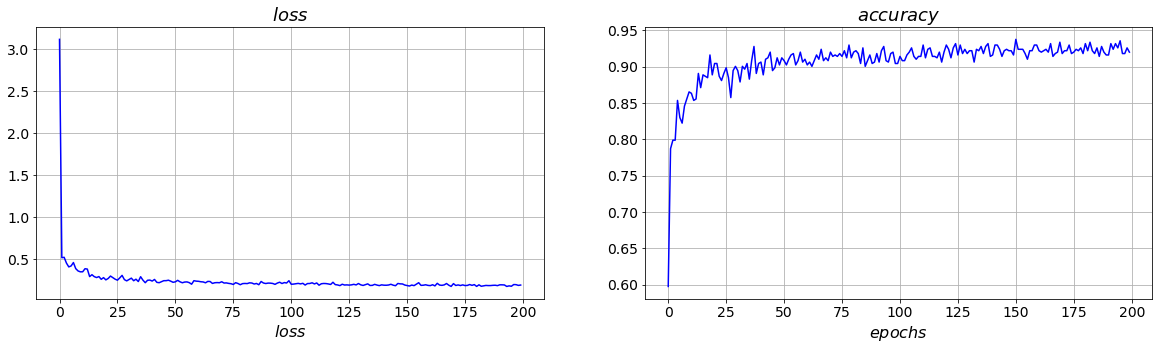

In [6]:
#Plot result

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt.subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(hist.history['loss'], 'b', label='train loss')
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xlabel("$loss$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.subplot(1,2,2)
plt.title("$accuracy$", fontsize = 18)
plt.plot(hist.history['accuracy'], 'b', label='train accuracy')
plt.grid()
plt.xlabel("$epochs$", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [7]:
#Test

results=model.evaluate(X_test,Y_test, verbose=0)
print('test loss, test accuracy:', results)

test loss, test accuracy: [0.18031588196754456, 0.9298245906829834]
